<a href="https://colab.research.google.com/github/Himanshu0518/Agroassist/blob/main/CropRecommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split , learning_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.metrics import accuracy_score, classification_report

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv('/content/Crop Recommendation using Soil Properties and Weather Prediction.csv')

In [ ]:
df.head()

,Soilcolor,Ph,K,P,N,Zn,S,QV2M-W,QV2M-Sp,QV2M-Su,...,PRECTOTCORR-W,PRECTOTCORR-Sp,PRECTOTCORR-Su,PRECTOTCORR-Au,WD10M,GWETTOP,CLOUD_AMT,WS2M_RANGE,PS,label
0,Yellowish brown,5.81,738.231,5.401,0.23,2.976000,13.816,7.993333,10.456667,11.963333,...,2.073333,5.27,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley
1,Yellowish brown,5.43,606.382,10.478,0.23,3.077000,16.421,7.993333,10.456667,11.963333,...,2.073333,5.27,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley
2,brown,5.41,386.580,6.847,0.23,6.611000,16.557,7.993333,10.456667,11.963333,...,2.073333,5.27,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley
3,red,5.65,207.086,3.418,0.23,0.460181,16.075,7.993333,10.456667,11.963333,...,2.073333,5.27,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley
4,red,5.27,317.357,39.282,0.23,2.743000,12.558,7.993333,10.456667,11.963333,...,2.073333,5.27,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley


In [ ]:

# df['temperature'] = (df['T2M_MAX-W'] + df['T2M_MAX-Sp'] + df['T2M_MAX-Su'] + df['T2M_MAX-Au'] +
#                      df['T2M_MIN-W'] + df['T2M_MIN-Sp'] + df['T2M_MIN-Su'] + df['T2M_MIN-Au']) / 8

# df['humidity'] = (df['QV2M-W'] + df['QV2M-Sp'] + df['QV2M-Su'] + df['QV2M-Au']) / 4

# df['rainfall'] = (df['PRECTOTCORR-W'] + df['PRECTOTCORR-Sp'] + df['PRECTOTCORR-Su'] + df['PRECTOTCORR-Au']) / 4

# # Keep only the required columns
# df_simplified = df[['N', 'P', 'K', 'temperature', 'humidity', 'Ph', 'rainfall', 'label']]



In [ ]:
sugarcane_df = pd.read_csv('/content/sugarcane_data.csv')

In [ ]:
sugarcane_df.columns = ['N', 'P', 'K', 'temperature', 'humidity', 'Ph', 'rainfall', 'label']

In [ ]:
sugarcane_df.head()

,N,P,K,temperature,humidity,Ph,rainfall,label
0,101,45,31,21.405122,79.805921,5.682412,295.487160,sugarcane
1,142,79,83,25.515737,68.398017,6.488841,276.317838,sugarcane
2,64,60,116,23.978036,88.645958,5.615118,275.749306,sugarcane
3,121,48,30,23.659845,82.136908,6.599058,220.303974,sugarcane
4,110,34,48,34.595158,76.630622,6.383061,212.222925,sugarcane


In [ ]:
# df_simplified.head()

In [ ]:
# df_simplified['label'].value_counts()

In [ ]:
df = pd.read_csv('/content/Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
df.columns = ['N', 'P', 'K', 'temperature', 'humidity', 'Ph', 'rainfall', 'label']

In [ ]:
df = pd.concat([df,sugarcane_df],axis=0)

In [ ]:
df.head()

,N,P,K,temperature,humidity,Ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
df['label'].value_counts().shape

(23,)

In [ ]:
df.shape

(2300, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2300 entries, 0 to 99
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2300 non-null   int64  
 1   P            2300 non-null   int64  
 2   K            2300 non-null   int64  
 3   temperature  2300 non-null   float64
 4   humidity     2300 non-null   float64
 5   Ph           2300 non-null   float64
 6   rainfall     2300 non-null   float64
 7   label        2300 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 161.7+ KB


In [ ]:
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

# Get the class names for later reference
class_names = label_encoder.classes_


In [ ]:
# import json
# from sklearn.preprocessing import LabelEncoder

# # Given crop names
# crops = [
#     "Barley", "Bean", "Dagussa", "Fallow", "Maize", "Niger seed",
#     "Pea", "Potato", "Red Pepper", "Sorghum", "Teff", "Wheat", "apple",
#     "banana", "blackgram", "chickpea", "coconut", "coffee", "cotton",
#     "grapes", "jute", "kidneybeans", "lentil", "maize", "mango",
#     "mothbeans", "mungbean", "muskmelon", "orange", "papaya",
#     "pigeonpeas", "pomegranate", "rice", "sugarcane", "watermelon"
# ]

# # Apply Label Encoding
# label_encoder = LabelEncoder()
# encoded_labels = label_encoder.fit_transform(crops)

# # Create the mapping dictionary
# crop_mapping = {int(encoded): crop for encoded, crop in zip(encoded_labels, crops)}

# # Save to JSON file
# with open("crop_mapping.json", "w") as file:
#     json.dump(crop_mapping, file, indent=4)

# print("JSON file 'crop_mapping.json' created successfully!")


In [ ]:
df['label'].value_counts()

,count
label,
20,100
11,100
3,100
9,100
18,100
13,100
14,100
2,100
10,100


In [ ]:
# class_names

In [ ]:
X = df.drop(['label'], axis=1)
y = df['label']

In [ ]:
df.head(2)

,N,P,K,temperature,humidity,Ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20


In [ ]:
X[0:2]

,N,P,K,temperature,humidity,Ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537


In [ ]:
y[0:2]

,label
0,20
1,20


In [ ]:
num_col = ["N","P","K","temperature","humidity","Ph","rainfall"]


In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
preprocessor = ColumnTransformer([
    ('num', RobustScaler(), num_col),
], remainder='passthrough')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

algorithms = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),

}


<Axes: >

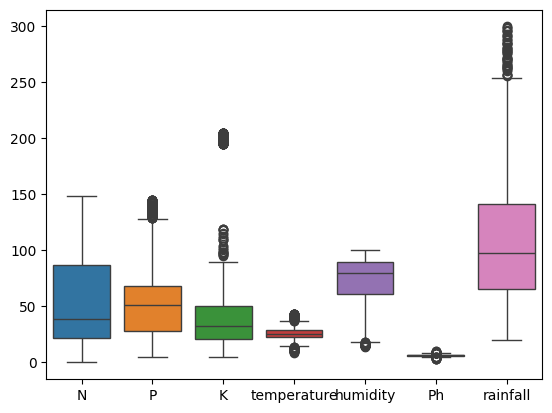

In [ ]:
sns.boxplot(X)

In [ ]:
def plot_data(mean_scores, std_dev, sizes, ax, label):
    ax.plot(sizes, mean_scores, marker='o' , label=f'{label} Mean')
    ax.fill_between(x=sizes,
                    y1=mean_scores - std_dev,
                    y2 = mean_scores + std_dev,
                    alpha=0.5, label=f'{label} Variation'
                    )


In [ ]:
def plot_learning_curve(name, algo):
    model = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', algo)
    ])

    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=3, scoring='accuracy', n_jobs=-1, random_state=42
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    train_score = f"{train_scores_mean[-1]:.2f} +/- {train_scores_std[-1]:.2f}"


    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    test_score = f"{test_scores_mean[-1]:.2f} +/- {test_scores_std[-1]:.2f}"

    fig,ax = plt.subplots()

    # Plot training set
    plot_data(train_scores_mean, train_scores_std, train_sizes, ax, label= f"Training ({train_score})")
    # Plot testing set
    plot_data(test_scores_mean, test_scores_std, train_sizes, ax, label=f"Testing ({test_score})")

    ax.set_xlabel('Training Sizes')
    ax.set_title(f"Learning Curve for {name}")
    ax.set_ylabel('Accuracy')
    ax.grid(True)
    ax.legend()
    plt.show()


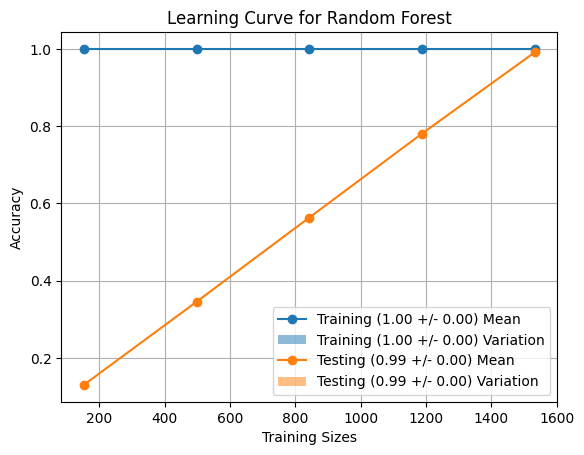

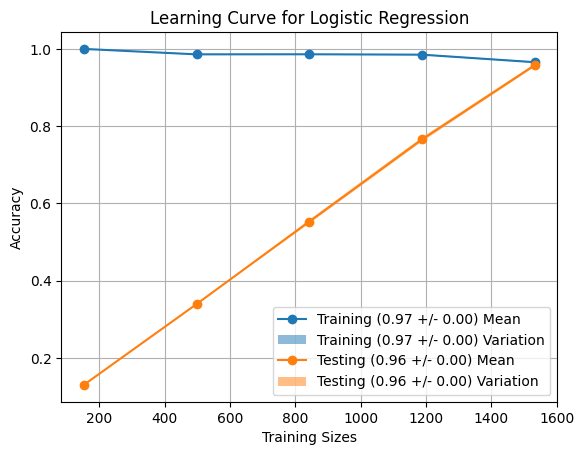

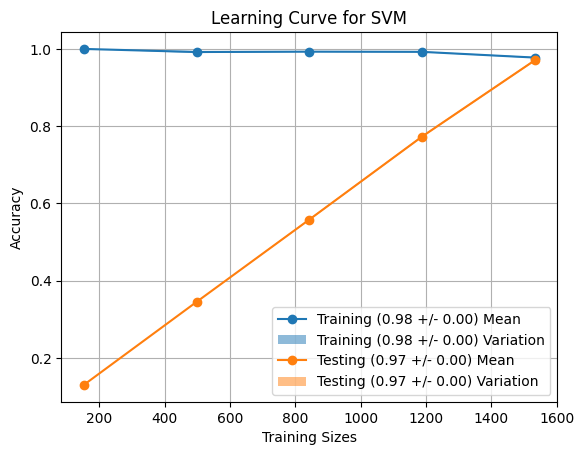

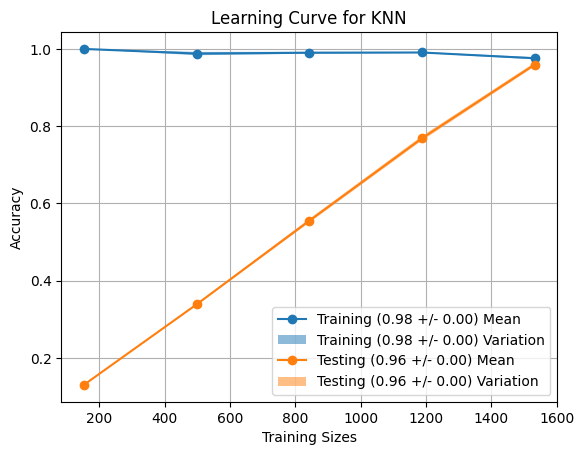

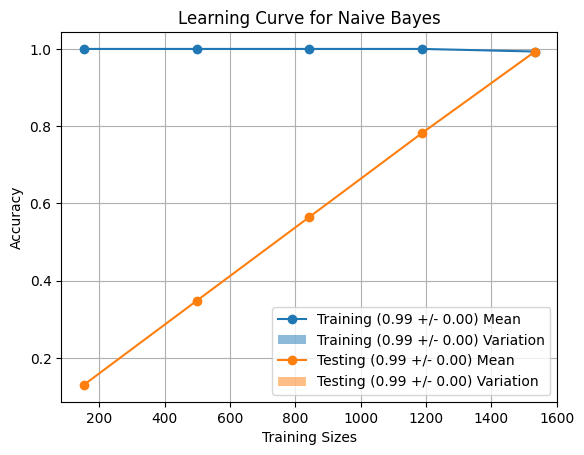

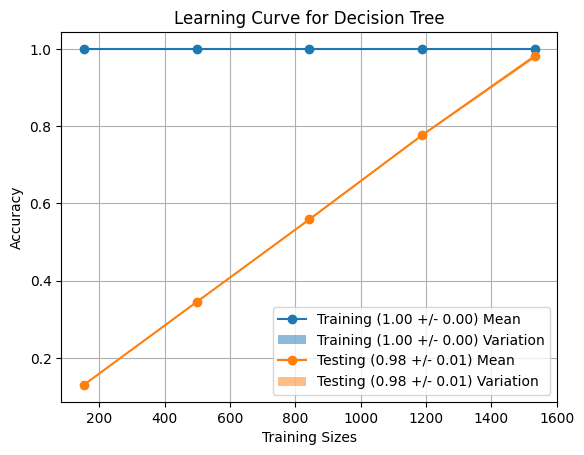

In [ ]:
for name,algo in algorithms.items():
  plot_learning_curve(name , algo)
  plt.show()

In [ ]:
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', RobustScaler(),
                                                  ['N', 'P', 'K', 'temperature',
                                                   'humidity', 'Ph',
                                                   'rainfall'])])),
                ('classifier', RandomForestClassifier())])

In [ ]:
def evaluate_model(X,y):
  y_pred = model.predict(X)
  report = classification_report (y,y_pred)
  return  report

In [ ]:
print("for test data",evaluate_model(X_test,y_test))
print("for train data",evaluate_model(X_train,y_train))

for test data               precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        22
           5       0.94      1.00      0.97        17
           6       1.00      1.00      1.00        19
           7       1.00      1.00      1.00        14
           8       0.91      1.00      0.95        21
           9       1.00      1.00      1.00        14
          10       1.00      1.00      1.00        16
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      1.00      1.00        17
          14       1.00      1.00      1.00        22
          15       1.00      1.00      1.00        26
          16       1.00      1.00      1.00        28
          17 

In [ ]:
import joblib

In [ ]:
joblib.dump(model,"crop_recommendation.joblib")

['crop_recommendation.joblib']

In [ ]:
saved_model = joblib.load("crop_recommendation.joblib")

In [ ]:
saved_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', RobustScaler(),
                                                  ['N', 'P', 'K', 'temperature',
                                                   'humidity', 'Ph',
                                                   'rainfall'])])),
                ('classifier', RandomForestClassifier())])

In [ ]:
X_test[0:2]

,N,P,K,temperature,humidity,Ph,rainfall
741,49,76,18,27.053652,67.701753,7.393632,60.469383
1917,100,46,18,24.185862,76.042040,6.431690,69.080567


In [ ]:
y_pred = saved_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.991304347826087

In [ ]:
# For a classifier that supports predict_proba:
probs = saved_model.predict_proba(X_test)[2]  # for a single instance
# Then sort to get the indices for top 5 recommendations
top5_indices = np.argsort(probs)[::-1][:5]
top5_classes = [saved_model.classes_[i] for i in top5_indices]
print("Top 5 recommended classes:", top5_classes)


Top 5 recommended classes: [np.int64(3), np.int64(21), np.int64(22), np.int64(19), np.int64(18)]


In [ ]:
print(probs)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
